In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
from plot_functions import filter_df,rename_df,convert_df,avg_over_tasks,plot_func,plot_func2,plot_func4
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette0 = sns.color_palette("deep")
#make a color palette with 5 values between white and black
palette1 = sns.color_palette("Greys", 5)

In [40]:
df = pd.read_pickle('reconstruction_accuracies100.pkl')
exp_settings = {'basis':['subject-specific','avg connectome basis','ind. surface','template surface','random_smoothed_basis','A_local'],
                'e_local':['1.0','none'],
                'density':['1e-05', '0.0001','0.001','0.01','0.05','none'],
                'binarization':['binary','weighted','none'],
                'fwhm':['0.0','2.0','6.0','10.0','none','24'],
                'contrast':np.loadtxt('contrast_list.txt',dtype=str),
                'streamlines':['20M','none']}

df2 = filter_df(df,exp_settings)
df2 = rename_df(df2)
df_plot,df_AUC = convert_df(df2,do_df_plot=False)
_,df_AUC = avg_over_tasks(df_plot,df_AUC,which=0,do_df_plot=False)
df_AUC['Basis'] = df_AUC['Basis'].replace('Individual surface','Subject-specific surface')
df_AUC['Basis'] = df_AUC['Basis'].replace('A_local','$A_{local}$')
df_AUC['Basis'] = df_AUC['Basis'].replace('Random smoothed basis','Random basis (24mm smoothing)')
for fwhm in df_AUC['Smoothing (FWHM)']:
    if fwhm != 'none' and fwhm != 'Unsmoothed':
        df_AUC['Smoothing (FWHM)'] = df_AUC['Smoothing (FWHM)'].replace(fwhm,fwhm[:-2])
palette0 = sns.color_palette("deep")

#make a color palette with 5 values between white and black
palette1 = sns.color_palette("Greys", 5)

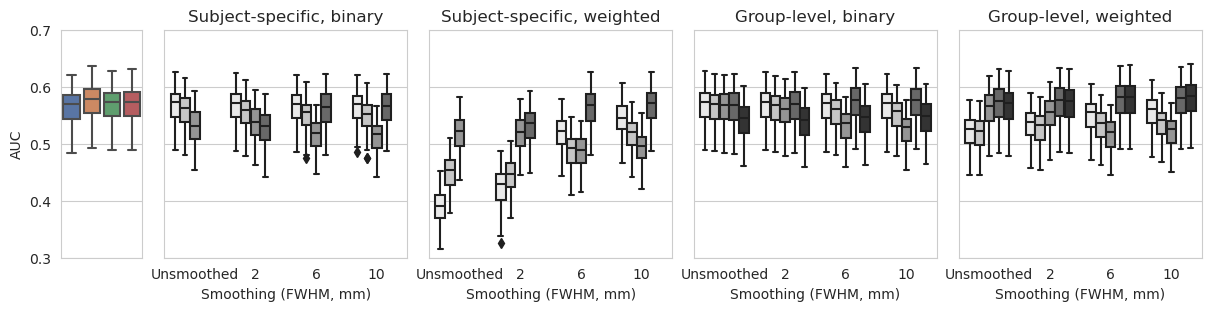

In [41]:
fig,axs = plt.subplots(1,5,width_ratios=[1,3,3,3,3],figsize=(12,3),layout='constrained')
dfs = []
dfs.append(df_AUC[df_AUC['Density (%)']=='none'])

df1 = df_AUC[df_AUC['Basis']=='Individual connectome']
df1 = df1[df1['Binarization']=='Binary']
dfs.append(df1)

df2 = df_AUC[df_AUC['Basis']=='Individual connectome']
df2 = df2[df2['Binarization']=='Weighted']
dfs.append(df2)

df3 = df_AUC[df_AUC['Basis']=='Average connectome']
df3 = df3[df3['Binarization']=='Binary']
dfs.append(df3)

df4 = df_AUC[df_AUC['Basis']=='Average connectome']
df4 = df4[df4['Binarization']=='Weighted']
dfs.append(df4)

for k in range(5):
    if k==0:
        sns.boxplot(x='Basis',y='Reconstruction accuracy',data=dfs[k],ax=axs[k],palette=palette0[:4],order=['Template surface','Subject-specific surface','$A_{local}$','Random basis (24mm smoothing)'])
    else:
        sns.boxplot(x='Smoothing (FWHM)',y='Reconstruction accuracy',hue='Density (%)',data=dfs[k],ax=axs[k],palette=palette1,order=['Unsmoothed','2','6','10'],hue_order=['0.001%', '0.01%','0.1%','1%','5%'])

    axs[k].set_ylim([0.3,0.7]);
    if k>0:
        axs[k].set_xlabel('Smoothing (FWHM, mm)')
        axs[k].get_legend().remove()
        axs[k].set_ylabel('')
        axs[k].set_yticks([0.3,0.4,0.5,0.6,0.7],labels='')
    else:
        axs[k].set_xlabel('')
        axs[k].set_xticks([])
        axs[k].set_yticks([0.3,0.4,0.5,0.6,0.7],labels=[0.3,0.4,0.5,0.6,0.7])
        axs[k].set_ylabel('AUC')
axs[0].set_title('')
axs[1].set_title('Subject-specific, binary')
axs[2].set_title('Subject-specific, weighted')
axs[3].set_title('Group-level, binary')
axs[4].set_title('Group-level, weighted')
fig.savefig('results/brainmaps/reconstruction_accuracies100.png',dpi=300,bbox_inches='tight')

In [42]:
# df_sorted = pd.read_pickle('reconstruction_accuracies_sorted100.pkl')
# exp_settings = {'basis':['subject-specific','avg connectome basis','ind. surface','template surface','random_smoothed_basis','A_local'],
#                 'e_local':['1.0','none'],
#                 'density':['1e-05', '0.0001','0.001','0.01','0.05','none'],
#                 'binarization':['binary','weighted','none'],
#                 'fwhm':['0.0','2.0','6.0','10.0','none','24'],
#                 'contrast':np.loadtxt('contrast_list.txt',dtype=str),
#                 'streamlines':['20M','none']}

# df2 = filter_df(df_sorted,exp_settings)
# df2 = rename_df(df2)
# df_plot,df_AUC_sorted = convert_df(df2,do_df_plot=False)
# _,df_AUC_sorted = avg_over_tasks(df_plot,df_AUC_sorted,which=0,do_df_plot=False)
# df_AUC_sorted['Basis'] = df_AUC_sorted['Basis'].replace('Individual surface','Subject-specific surface')
# df_AUC_sorted['Basis'] = df_AUC_sorted['Basis'].replace('A_local','$A_{local}$')
# df_AUC_sorted['Basis'] = df_AUC_sorted['Basis'].replace('Random smoothed basis','Random basis (24mm smoothing)')
# for fwhm in df_AUC_sorted['Smoothing (FWHM)']:
#     if fwhm != 'none' and fwhm != 'Unsmoothed':
#         df_AUC_sorted['Smoothing (FWHM)'] = df_AUC_sorted['Smoothing (FWHM)'].replace(fwhm,fwhm[:-2])


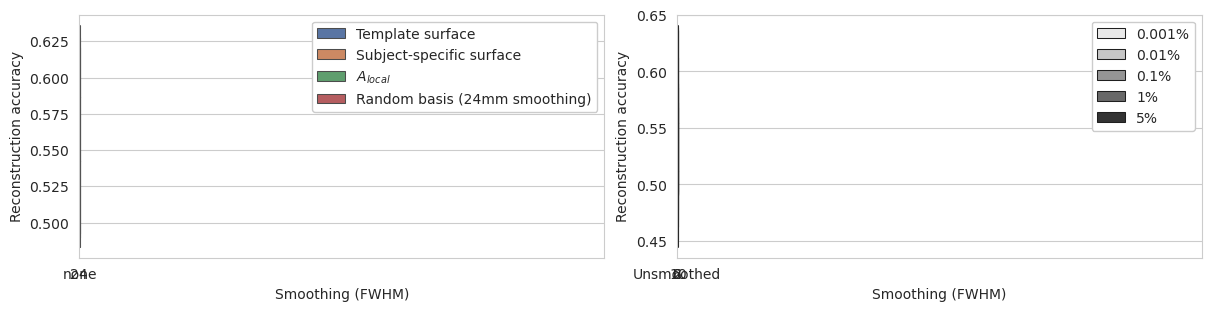

In [43]:
#legends
fig,axs = plt.subplots(1,2,figsize=(12,3),layout='constrained')
dfs = []
dfs.append(df_AUC[df_AUC['Density (%)']=='none'])

df4 = df_AUC[df_AUC['Basis']=='Average connectome']
df4 = df4[df4['Binarization']=='Weighted']
dfs.append(df4)

for k in range(2):
    if k==0:
        sns.boxplot(x='Smoothing (FWHM)',y='Reconstruction accuracy',hue='Basis',data=dfs[k],ax=axs[k],palette=palette0,hue_order=['Template surface','Subject-specific surface','$A_{local}$','Random basis (24mm smoothing)'])
        #legend without opacity
        handles, labels = axs[k].get_legend_handles_labels()
        axs[k].legend(handles=handles[0:], labels=labels[0:],loc='upper left')
    else:
        sns.boxplot(x='Smoothing (FWHM)',y='Reconstruction accuracy',hue='Density (%)',data=dfs[k],ax=axs[k],palette=palette1,order=['Unsmoothed','2','6','10'],hue_order=['0.001%', '0.01%','0.1%','1%','5%'])
    axs[k].set_xlim([0,1000]);
#legend without opacity
    handles, labels = axs[k].get_legend_handles_labels()
    axs[k].legend(handles=handles[0:], labels=labels[0:],loc='upper right',framealpha=1)
fig.savefig('results/brainmaps/reconstruction_accuracies100_legend.png',dpi=300,bbox_inches='tight')

In [44]:
df = pd.read_pickle('reconstruction_accuracies_SSBCAP100.pkl')
exp_settings = {'basis':['subject-specific','avg connectome basis','ind. surface','template surface','random_smoothed_basis','A_local'],
                'e_local':['1.0','none'],
                'density':['1e-05', '0.0001','0.001','0.01','0.05','none'],
                'binarization':['binary','weighted','none'],
                'fwhm':['0.0','2.0','6.0','10.0','none','24'],
                'streamlines':['20M','none']}

df2 = filter_df(df,exp_settings)
df2 = rename_df(df2)
df_plot,df_AUC = convert_df(df2,do_df_plot=False)
_,df_AUC = avg_over_tasks(df_plot,df_AUC,which=0,do_df_plot=False)
df_AUC['Basis'] = df_AUC['Basis'].replace('Individual surface','Subject-specific surface')
df_AUC['Basis'] = df_AUC['Basis'].replace('A_local','$A_{local}$')
df_AUC['Basis'] = df_AUC['Basis'].replace('Random smoothed basis','Random basis (24mm smoothing)')
for fwhm in df_AUC['Smoothing (FWHM)']:
    if fwhm != 'none' and fwhm != 'Unsmoothed':
        df_AUC['Smoothing (FWHM)'] = df_AUC['Smoothing (FWHM)'].replace(fwhm,fwhm[:-2])
palette0 = sns.color_palette("deep")

#make a color palette with 5 values between white and black
palette1 = sns.color_palette("Greys", 5)

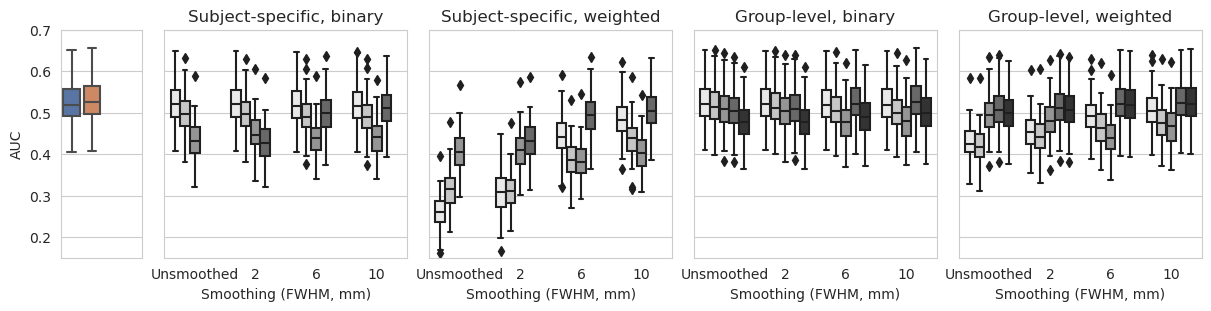

In [45]:
fig,axs = plt.subplots(1,5,width_ratios=[1,3,3,3,3],figsize=(12,3),layout='constrained')
dfs = []
dfs.append(df_AUC[df_AUC['Density (%)']=='none'])

df1 = df_AUC[df_AUC['Basis']=='Individual connectome']
df1 = df1[df1['Binarization']=='Binary']
dfs.append(df1)

df2 = df_AUC[df_AUC['Basis']=='Individual connectome']
df2 = df2[df2['Binarization']=='Weighted']
dfs.append(df2)

df3 = df_AUC[df_AUC['Basis']=='Average connectome']
df3 = df3[df3['Binarization']=='Binary']
dfs.append(df3)

df4 = df_AUC[df_AUC['Basis']=='Average connectome']
df4 = df4[df4['Binarization']=='Weighted']
dfs.append(df4)

for k in range(5):
    if k==0:
        sns.boxplot(x='Basis',y='Reconstruction accuracy',data=dfs[k],ax=axs[k],palette=palette0[:4],order=['Template surface','Subject-specific surface','$A_{local}$','Random basis (24mm smoothing)'])
    else:
        sns.boxplot(x='Smoothing (FWHM)',y='Reconstruction accuracy',hue='Density (%)',data=dfs[k],ax=axs[k],palette=palette1,order=['Unsmoothed','2','6','10'],hue_order=['0.001%', '0.01%','0.1%','1%','5%'])

    axs[k].set_ylim([0.15,0.7]);
    if k>0:
        axs[k].set_xlabel('Smoothing (FWHM, mm)')
        axs[k].get_legend().remove()
        axs[k].set_ylabel('')
        axs[k].set_yticks([0.2,0.3,0.4,0.5,0.6,0.7],labels='')
    else:
        axs[k].set_xlabel('')
        axs[k].set_xticks([])
        axs[k].set_yticks([0.2,0.3,0.4,0.5,0.6,0.7],labels=[0.2,0.3,0.4,0.5,0.6,0.7])
        axs[k].set_ylabel('AUC')
axs[0].set_title('')
axs[1].set_title('Subject-specific, binary')
axs[2].set_title('Subject-specific, weighted')
axs[3].set_title('Group-level, binary')
axs[4].set_title('Group-level, weighted')
fig.savefig('results/brainmaps/reconstruction_accuracies_SSBCAP100.png',dpi=300,bbox_inches='tight')